In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from copy import deepcopy
import sklearn
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [8]:
# function to update weights
def f(x1,x2,x3,y,l):
    np.random.seed(123)
    w = np.random.rand(1,3).flatten().tolist()
    wt = deepcopy(w)
    t = 1

    while t < 200:
        
        for i in range(len(y)):
            wt_sum = w[0]*x1[i] + w[1]*x2[i] + w[2]*x3[i]
            if wt_sum > 0:
                ypred = 1
            else:
                ypred = 0
            if ypred == y[i]:
                t = t + 1
            else:
                w[0] = w[0] + l*(y[i] - ypred)*x1[i]
                w[1] = w[1] + l*(y[i] - ypred)*x2[i]
                w[2] = w[2] + l*(y[i] - ypred)*x3[i]
                t = t + 1
                break
    w1 = w[0]
    w2 = w[1]
    w3 = w[2]
    return w1,w2,w3
        
    

In [9]:
X1 = [3,0,3,0]
X2 = [1,1,0,0]
X3 = [1,1,1,1] #biases
Y = [1,1,1,0] 

In [10]:
w1,w2,w3 = f(X1,X2,X3,Y,1.5)

In [11]:
print('weight for feature X1:', w1)
print('weight for feature X2:', w2)
print('weight for feature X3:', w3)
print('Learing rate is taken to be', 1.5)

weight for feature X1: 0.6964691855978616
weight for feature X2: 1.7861393349503794
weight for feature X3: -1.273148546435797
Learing rate is taken to be 1.5


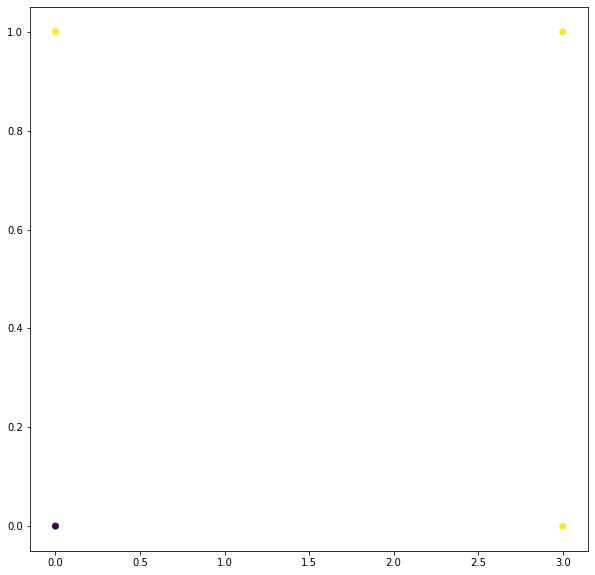

In [12]:
plt.figure(figsize=(10, 10))

plt.scatter(X1, X2, c = Y)


<Figure size 720x720 with 0 Axes>

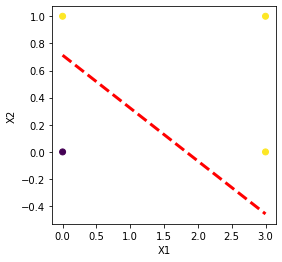

In [13]:
plt.figure(figsize=(10, 10))

xx = np.linspace(0, 3, 1000)
yy = -1* (w1/w2) * xx  -1 * (w3/w2)

plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(X1, X2, c = Y)
plt.plot(xx, yy, 'r--', lw=3)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [14]:
def f2(x1,x2,x3,y,l, r):
    np.random.seed(r)
    w = np.random.rand(1,2).flatten().tolist()
    w3 = -1 
    wt = deepcopy(w)
    t = 1

    while t < 200:
        
        for i in range(len(y)):
            wt_sum = w[0]*x1[i] + w[1]*x2[i] - 1*x3[i]
            if wt_sum > 0:
                ypred = 1
            else:
                ypred = 0
            if ypred == y[i]:
                t = t + 1
            else:
                w[0] = w[0] + l*(y[i] - ypred)*x1[i]
                w[1] = w[1] + l*(y[i] - ypred)*x2[i]
                t = t + 1
                break
    w1 = w[0]
    w2 = w[1]
    return w1,w2,w3

In [15]:
l1 = f2(X1,X2,X3,Y,1.5,123)
l1 = list(l1)

In [16]:
l1

[0.6964691855978616, 1.7861393349503794, -1]

In [17]:
list_ofw1 = []
list_ofw2 = []
i = 0
list_of_iter = []
for r in range(50):
    list_of_iter.append(i)
    l1 = f2(X1,X2,X3,Y,1.5,r)
    l1 = list(l1)
    list_ofw1.append(l1[0])
    list_ofw2.append(l1[1])
    i += 1
    
    
    
    
    
    
    
    

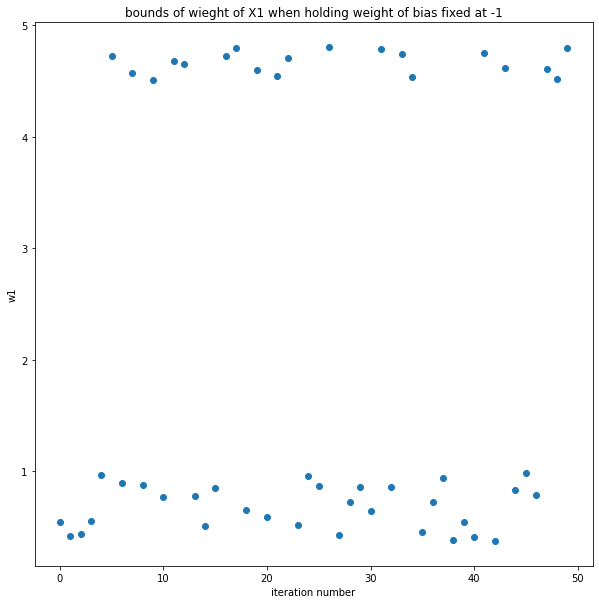

In [18]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(list_of_iter, list_ofw1)
plt.title('bounds of wieght of X1 when holding weight of bias fixed at -1')

ax.set_xlabel('iteration number')
ax.set_ylabel('w1')
plt.show()

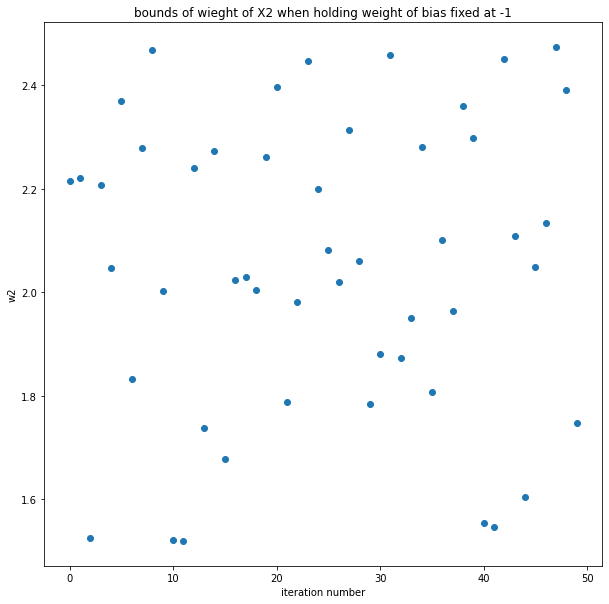

In [19]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(list_of_iter, list_ofw2)
plt.title('bounds of wieght of X2 when holding weight of bias fixed at -1')

ax.set_xlabel('iteration number')
ax.set_ylabel('w2')
plt.show()

In [20]:
X12 = [2,2,0,0]
X22 = [5,0,5,0]
X32 = [1,1,1,1] #biases
Y2 = [1,0,0,0] 

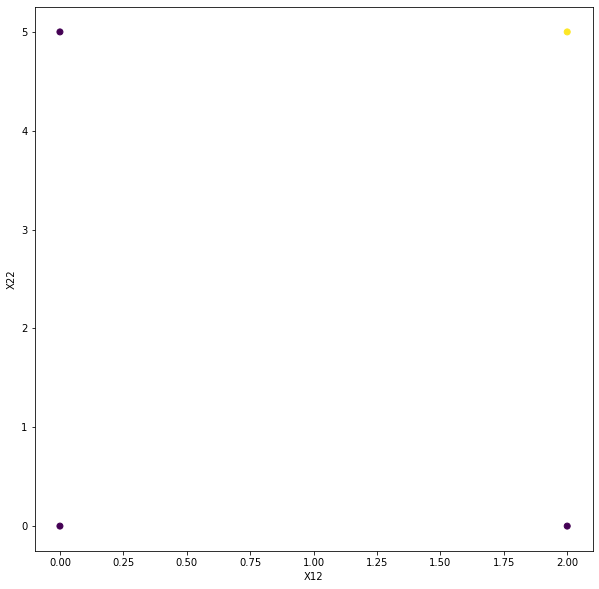

In [21]:
plt.figure(figsize=(10, 10))

plt.scatter(X12, X22, c = Y2)
plt.xlabel('X12');
plt.ylabel('X22');

In [22]:
w1,w2,w3 = f(X12,X22,X32,Y2,1.5)
print('weight for feature X1:', w1)
print('weight for feature X2:', w2)
print('weight for feature X3:', w3)
print('Learing rate is taken to be', 1.5)

weight for feature X1: 18.696469185597863
weight for feature X2: 7.78613933495038
weight for feature X3: -40.2731485464358
Learing rate is taken to be 1.5


<Figure size 720x720 with 0 Axes>

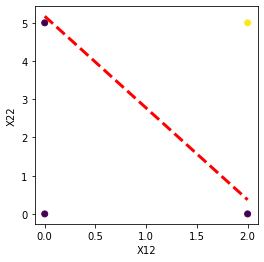

In [23]:
plt.figure(figsize=(10, 10))

xx2 = np.linspace(0, 2, 1000)
yy2 = -1* (w1/w2) * xx2  -1 * (w3/w2)

plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(X12, X22, c = Y2)
#plt.plot(xx2,yy2, 'ko')
plt.plot(xx2, yy2, 'r--', lw=3)

ax.set_xlabel('X12')
ax.set_ylabel('X22')
plt.show()

In [24]:
list_ofw1 = []
list_ofw2 = []
i = 0
list_of_iter = []
for r in range(50):
    list_of_iter.append(i)
    l1 = f2(X12,X22,X32,Y,1.5,r)
    l1 = list(l1)
    list_ofw1.append(l1[0])
    list_ofw2.append(l1[1])
    i += 1

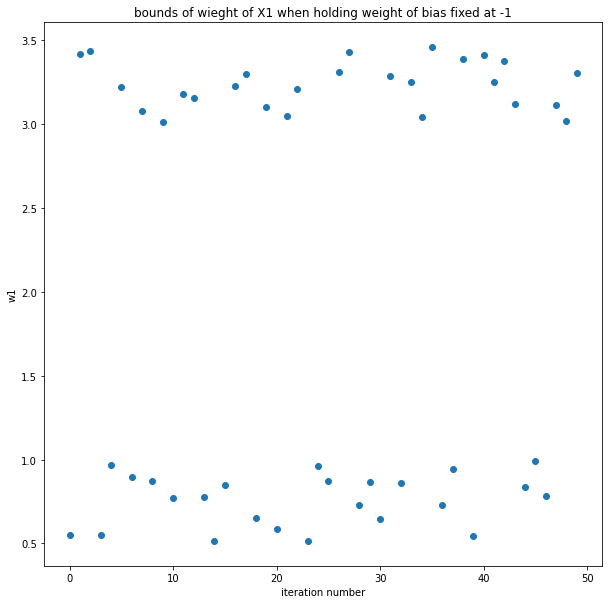

In [25]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(list_of_iter, list_ofw1)
plt.title('bounds of wieght of X1 when holding weight of bias fixed at -1')

ax.set_xlabel('iteration number')
ax.set_ylabel('w1')
plt.show()

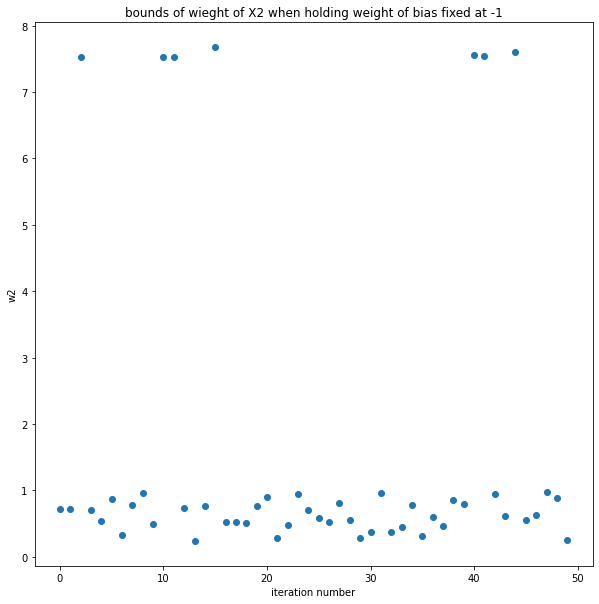

In [26]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(list_of_iter, list_ofw2)
plt.title('bounds of wieght of X2 when holding weight of bias fixed at -1')

ax.set_xlabel('iteration number')
ax.set_ylabel('w2')
plt.show()

In [27]:
from sklearn.datasets import fetch_california_housing
cali_df = fetch_california_housing(as_frame=True)
#cali_df= fetch_california_housing()
data = np.c_[cali_df.data, cali_df.target]
columns = np.append(cali_df.feature_names, ["target"])
cali_df = pd.DataFrame(data, columns=columns)

In [28]:
cali_df['highPriced'] = np.where(cali_df['target'] > 3.500, True, False)


In [29]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,highPriced
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,True
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,True
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,True
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,False
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,False
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,False
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,False
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,False


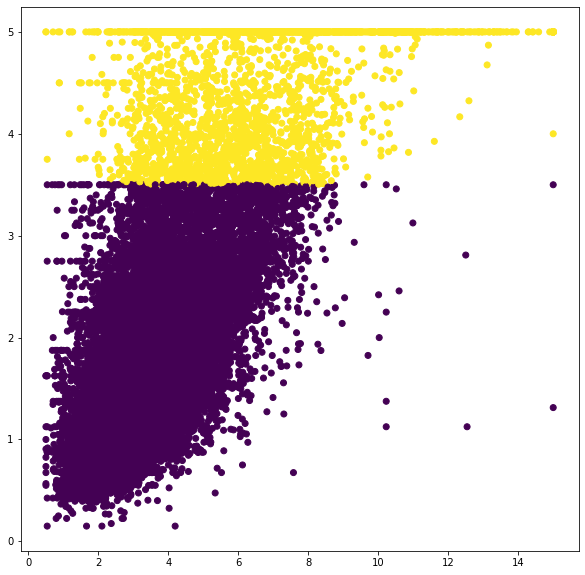

In [30]:
plt.figure(figsize=(10, 10))

plt.scatter(cali_df['MedInc'], cali_df['target'], c = cali_df['highPriced'])


In [31]:
df_copy = deepcopy(cali_df)

In [32]:
df_copy = df_copy[(df_copy['target'] <= 3.00) | (df_copy['target'] >= 4.00)]



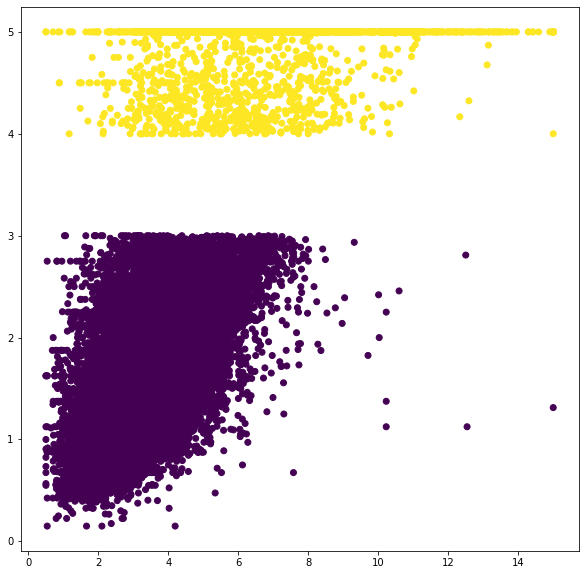

In [33]:
plt.figure(figsize=(10, 10))

plt.scatter(df_copy['MedInc'], df_copy['target'], c = df_copy['highPriced'])


In [34]:
X = df_copy[['MedInc', 'target']]
Y = df_copy[['highPriced']]


In [35]:
X.shape

(18575, 2)

In [36]:
Y.shape

(18575, 1)

In [37]:
X['Bias'] = 1


In [38]:
X_array = X.to_numpy()
Y_array = Y.to_numpy()

In [39]:
X.head(5)

,MedInc,target,Bias
0,8.3252,4.526,1
5,4.0368,2.697,1
6,3.6591,2.992,1
7,3.1200,2.414,1
8,2.0804,2.267,1


In [42]:
X_array[:5]

array([[8.3252, 4.526 , 1.    ],
       [4.0368, 2.697 , 1.    ],
       [3.6591, 2.992 , 1.    ],
       [3.12  , 2.414 , 1.    ],
       [2.0804, 2.267 , 1.    ]])

In [43]:
X.shape

(18575, 3)

In [44]:
Y.shape

(18575, 1)

In [45]:
Y

,highPriced
0,True
5,False
6,False
7,False
8,False
...,...
20635,False
20636,False
20637,False
20638,False


In [46]:
# 1 means highpriced, 0 means not highprices
Y['highPriced2'] = np.where(Y['highPriced'] == True , 1, 0)
Y = Y.drop('highPriced', axis=1)


In [47]:
np.random.seed(123)
w_cali = np.random.rand(1,3).flatten()


In [48]:
type(w_cali)

numpy.ndarray

In [49]:
w_cali

array([0.69646919, 0.28613933, 0.22685145])

In [50]:
#step_size
s = 0.1

In [51]:
print(w_cali.shape)
w_cali = np.expand_dims(w_cali, -1)
print(w_cali.shape)

(3,)
(3, 1)


In [52]:
X_array.T.shape

(3, 18575)

In [53]:
w_cali.shape

(3, 1)

In [54]:
Y.shape

(18575, 1)

In [55]:

def myPerceptron(Xf , wt_v, Y_gt):
    mul2 = np.dot(Xf ,wt_v)
    
    wX = pd.DataFrame(mul2, columns = ['wX'])
    wX['highPriced_pred'] = np.where(wX['wX'] > 3.500, 1, 0)
    Y_gt.reset_index(drop=True, inplace=True)
    mis_check = pd.concat([wX, Y_gt], axis=1)
    mis_check['track'] = np.where(mis_check['highPriced_pred'] == mis_check['highPriced2'], 0, 1)
    
    
    miscalculations = sum(mis_check['track'])
    error = miscalculations



    Y_minusYpred = mis_check['highPriced2'] - mis_check['highPriced_pred'] #gets you a pandas core series
    del_wt2 = np.dot(s*Y_minusYpred.to_numpy(), Xf)
    wt_updated = w_cali.T + del_wt2
    wt_updated = wt_updated.T


    return wt_updated, error

In [56]:
i = 1
error = 1
iteration_number = []
error_list = []
while error > 0:
    iteration_number.append(i)

    print('Iteration number:', i)
    print('Initial Weight: ', w_cali)

    w_cali = myPerceptron(X_array , w_cali, Y)[0]
    error = myPerceptron(X_array , w_cali, Y)[1]
    error_list.append(error)
    i += 1
    print('MISCLASSIFICATION:', error)
    print('Updated Weight: ', w_cali)
    
    
    
    

Iteration number: 1
Initial Weight:  [[0.69646919]
 [0.28613933]
 [0.22685145]]
MISCLASSIFICATION: 1771
Updated Weight:  [[-2553.44613081]
 [-1088.26363267]
 [ -511.97314855]]
Iteration number: 2
Initial Weight:  [[-2553.44613081]
 [-1088.26363267]
 [ -511.97314855]]
MISCLASSIFICATION: 1771
Updated Weight:  [[-1330.88202081]
 [ -249.06266767]
 [ -334.87314855]]
Iteration number: 3
Initial Weight:  [[-1330.88202081]
 [ -249.06266767]
 [ -334.87314855]]
MISCLASSIFICATION: 15370
Updated Weight:  [[-108.31791081]
 [ 590.13829733]
 [-157.77314855]]
Iteration number: 4
Initial Weight:  [[-108.31791081]
 [ 590.13829733]
 [-157.77314855]]
MISCLASSIFICATION: 1771
Updated Weight:  [[-5392.21644081]
 [-2031.35060267]
 [-1694.77314855]]
Iteration number: 5
Initial Weight:  [[-5392.21644081]
 [-2031.35060267]
 [-1694.77314855]]
MISCLASSIFICATION: 1771
Updated Weight:  [[-4169.65233081]
 [-1192.14963767]
 [-1517.67314855]]
Iteration number: 6
Initial Weight:  [[-4169.65233081]
 [-1192.14963767]
 [-1

MISCLASSIFICATION: 1717
Updated Weight:  [[-1846.95157081]
 [ 2218.74166933]
 [-5908.97314855]]
Iteration number: 57
Initial Weight:  [[-1846.95157081]
 [ 2218.74166933]
 [-5908.97314855]]
MISCLASSIFICATION: 805
Updated Weight:  [[ -634.61082081]
 [ 3031.76790333]
 [-5737.27314855]]
Iteration number: 58
Initial Weight:  [[ -634.61082081]
 [ 3031.76790333]
 [-5737.27314855]]
MISCLASSIFICATION: 412
Updated Weight:  [[ -791.92679081]
 [ 2852.13825233]
 [-5807.17314855]]
Iteration number: 59
Initial Weight:  [[ -791.92679081]
 [ 2852.13825233]
 [-5807.17314855]]
MISCLASSIFICATION: 1014
Updated Weight:  [[ -498.44291081]
 [ 2948.85943533]
 [-5792.17314855]]
Iteration number: 60
Initial Weight:  [[ -498.44291081]
 [ 2948.85943533]
 [-5792.17314855]]
MISCLASSIFICATION: 614
Updated Weight:  [[ -846.29851081]
 [ 2671.73283533]
 [-5893.37314855]]
Iteration number: 61
Initial Weight:  [[ -846.29851081]
 [ 2671.73283533]
 [-5893.37314855]]
MISCLASSIFICATION: 2740
Updated Weight:  [[ -259.27107081]

MISCLASSIFICATION: 22
Updated Weight:  [[ -372.46271081]
 [ 2613.72995733]
 [-6818.57314855]]
Iteration number: 110
Initial Weight:  [[ -372.46271081]
 [ 2613.72995733]
 [-6818.57314855]]
MISCLASSIFICATION: 22
Updated Weight:  [[ -370.39422081]
 [ 2610.11765733]
 [-6819.97314855]]
Iteration number: 111
Initial Weight:  [[ -370.39422081]
 [ 2610.11765733]
 [-6819.97314855]]
MISCLASSIFICATION: 20
Updated Weight:  [[ -368.32573081]
 [ 2606.50535733]
 [-6821.37314855]]
Iteration number: 112
Initial Weight:  [[ -368.32573081]
 [ 2606.50535733]
 [-6821.37314855]]
MISCLASSIFICATION: 20
Updated Weight:  [[ -365.88988081]
 [ 2603.46805733]
 [-6822.57314855]]
Iteration number: 113
Initial Weight:  [[ -365.88988081]
 [ 2603.46805733]
 [-6822.57314855]]
MISCLASSIFICATION: 20
Updated Weight:  [[ -363.45403081]
 [ 2600.43075733]
 [-6823.77314855]]
Iteration number: 114
Initial Weight:  [[ -363.45403081]
 [ 2600.43075733]
 [-6823.77314855]]
MISCLASSIFICATION: 20
Updated Weight:  [[ -361.01818081]
 [ 

MISCLASSIFICATION: 9
Updated Weight:  [[ -287.21549081]
 [ 2498.62585733]
 [-6862.47314855]]
Iteration number: 167
Initial Weight:  [[ -287.21549081]
 [ 2498.62585733]
 [-6862.47314855]]
MISCLASSIFICATION: 10
Updated Weight:  [[ -287.07970081]
 [ 2496.62585733]
 [-6863.17314855]]
Iteration number: 168
Initial Weight:  [[ -287.07970081]
 [ 2496.62585733]
 [-6863.17314855]]
MISCLASSIFICATION: 9
Updated Weight:  [[ -285.71099081]
 [ 2495.04255733]
 [-6863.77314855]]
Iteration number: 169
Initial Weight:  [[ -285.71099081]
 [ 2495.04255733]
 [-6863.77314855]]
MISCLASSIFICATION: 10
Updated Weight:  [[ -285.57520081]
 [ 2493.04255733]
 [-6864.47314855]]
Iteration number: 170
Initial Weight:  [[ -285.57520081]
 [ 2493.04255733]
 [-6864.47314855]]
MISCLASSIFICATION: 9
Updated Weight:  [[ -284.20649081]
 [ 2491.45925733]
 [-6865.07314855]]
Iteration number: 171
Initial Weight:  [[ -284.20649081]
 [ 2491.45925733]
 [-6865.07314855]]
MISCLASSIFICATION: 8
Updated Weight:  [[ -284.07070081]
 [ 2489

MISCLASSIFICATION: 5
Updated Weight:  [[ -246.40498081]
 [ 2449.47595733]
 [-6880.57314855]]
Iteration number: 215
Initial Weight:  [[ -246.40498081]
 [ 2449.47595733]
 [-6880.57314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -245.46642081]
 [ 2448.67595733]
 [-6880.87314855]]
Iteration number: 216
Initial Weight:  [[ -245.46642081]
 [ 2448.67595733]
 [-6880.87314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -244.33957081]
 [ 2448.17595733]
 [-6881.07314855]]
Iteration number: 217
Initial Weight:  [[ -244.33957081]
 [ 2448.17595733]
 [-6881.07314855]]
MISCLASSIFICATION: 5
Updated Weight:  [[ -243.21272081]
 [ 2447.67595733]
 [-6881.27314855]]
Iteration number: 218
Initial Weight:  [[ -243.21272081]
 [ 2447.67595733]
 [-6881.27314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -242.27416081]
 [ 2446.87595733]
 [-6881.57314855]]
Iteration number: 219
Initial Weight:  [[ -242.27416081]
 [ 2446.87595733]
 [-6881.57314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -241.14731081]
 [ 2446.3

MISCLASSIFICATION: 4
Updated Weight:  [[ -189.88286081]
 [ 2417.87595733]
 [-6892.87314855]]
Iteration number: 268
Initial Weight:  [[ -189.88286081]
 [ 2417.87595733]
 [-6892.87314855]]
MISCLASSIFICATION: 5
Updated Weight:  [[ -188.75601081]
 [ 2417.37595733]
 [-6893.07314855]]
Iteration number: 269
Initial Weight:  [[ -188.75601081]
 [ 2417.37595733]
 [-6893.07314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -187.81745081]
 [ 2416.57595733]
 [-6893.37314855]]
Iteration number: 270
Initial Weight:  [[ -187.81745081]
 [ 2416.57595733]
 [-6893.37314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -186.69060081]
 [ 2416.07595733]
 [-6893.57314855]]
Iteration number: 271
Initial Weight:  [[ -186.69060081]
 [ 2416.07595733]
 [-6893.57314855]]
MISCLASSIFICATION: 5
Updated Weight:  [[ -185.56375081]
 [ 2415.57595733]
 [-6893.77314855]]
Iteration number: 272
Initial Weight:  [[ -185.56375081]
 [ 2415.57595733]
 [-6893.77314855]]
MISCLASSIFICATION: 4
Updated Weight:  [[ -184.62519081]
 [ 2414.7

MISCLASSIFICATION: 2
Updated Weight:  [[ -176.88928081]
 [ 2389.97595733]
 [-6902.77314855]]
Iteration number: 312
Initial Weight:  [[ -176.88928081]
 [ 2389.97595733]
 [-6902.77314855]]
MISCLASSIFICATION: 3
Updated Weight:  [[ -177.09838081]
 [ 2389.37595733]
 [-6902.97314855]]
Iteration number: 313
Initial Weight:  [[ -177.09838081]
 [ 2389.37595733]
 [-6902.97314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -175.80747081]
 [ 2389.17595733]
 [-6903.07314855]]
Iteration number: 314
Initial Weight:  [[ -175.80747081]
 [ 2389.17595733]
 [-6903.07314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -176.01657081]
 [ 2388.57595733]
 [-6903.27314855]]
Iteration number: 315
Initial Weight:  [[ -176.01657081]
 [ 2388.57595733]
 [-6903.27314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -176.22567081]
 [ 2387.97595733]
 [-6903.47314855]]
Iteration number: 316
Initial Weight:  [[ -176.22567081]
 [ 2387.97595733]
 [-6903.47314855]]
MISCLASSIFICATION: 3
Updated Weight:  [[ -176.43477081]
 [ 2387.3

MISCLASSIFICATION: 3
Updated Weight:  [[ -170.21687081]
 [ 2366.17595733]
 [-6911.07314855]]
Iteration number: 359
Initial Weight:  [[ -170.21687081]
 [ 2366.17595733]
 [-6911.07314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -168.92596081]
 [ 2365.97595733]
 [-6911.17314855]]
Iteration number: 360
Initial Weight:  [[ -168.92596081]
 [ 2365.97595733]
 [-6911.17314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -169.13506081]
 [ 2365.37595733]
 [-6911.37314855]]
Iteration number: 361
Initial Weight:  [[ -169.13506081]
 [ 2365.37595733]
 [-6911.37314855]]
MISCLASSIFICATION: 1
Updated Weight:  [[ -169.34416081]
 [ 2364.77595733]
 [-6911.57314855]]
Iteration number: 362
Initial Weight:  [[ -169.34416081]
 [ 2364.77595733]
 [-6911.57314855]]
MISCLASSIFICATION: 1
Updated Weight:  [[ -169.44714081]
 [ 2364.47595733]
 [-6911.67314855]]
Iteration number: 363
Initial Weight:  [[ -169.44714081]
 [ 2364.47595733]
 [-6911.67314855]]
MISCLASSIFICATION: 2
Updated Weight:  [[ -169.55012081]
 [ 2364.1

<function matplotlib.pyplot.show(close=None, block=None)>

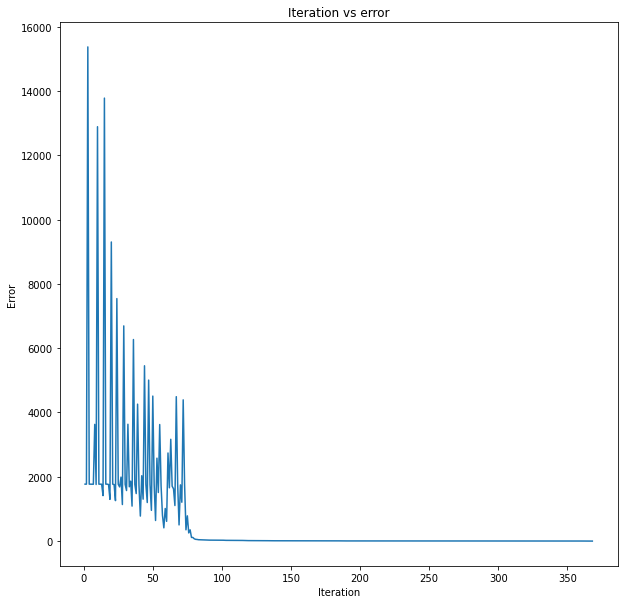

In [57]:
# Vizualising the errors per iteration
plt.figure(figsize=(10, 10))

plt.plot(iteration_number, error_list)
plt.title('Iteration vs error')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

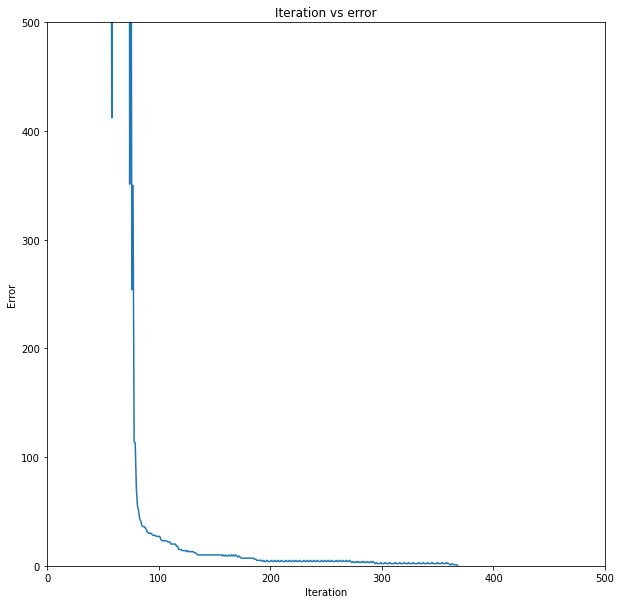

In [58]:
# zooomed in
plt.figure(figsize=(10, 10))
plt.ylim(0,500, 10)
plt.xlim(0,500)
plt.plot(iteration_number, error_list)
plt.title('Iteration vs error')
plt.xlabel("Iteration")
plt.ylabel("Error")


plt.show

In [59]:
print('Converges at:', max(iteration_number))

Converges at: 368


In [85]:
w1m = -168.56501081
w2t = 2363.07595733
w3b = -6912.17314855

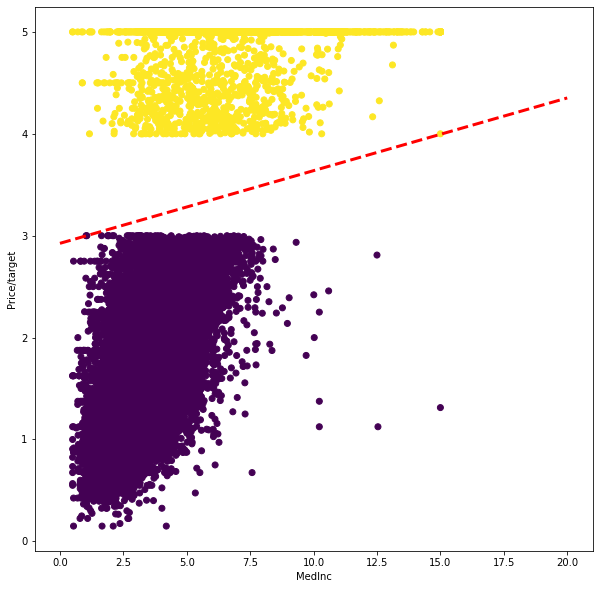

In [86]:
plt.figure(figsize=(10, 10))

xx = np.linspace(0, 20, 1000)
yy = -1* (w1m/w2t) * xx  -1 * (w3b/w2t)

ax = plt.axes()
ax.scatter(df_copy['MedInc'], df_copy['target'], c = df_copy['highPriced'] )
plt.plot(xx, yy, 'r--', lw=3)

ax.set_xlabel('MedInc')
ax.set_ylabel('Price/target')
plt.show()